# Common Training Problems and Regularization

## Load Necessary Packages

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop # import this because we will want to change the learning rate
import matplotlib.pyplot as plt 

## Plotting Function

We will be making many plots so it will be easier, and keep this notebook cleaner, if we create a function to do this for us. (This is also part of the DRY principle: Don't Repeat Yourself.)

In [3]:
def DL_plot(hist, plt_type="accuracy"):
    """Takes in a history object produced my model.fit() to 
    produce a plot for either accuracy or loss (depending on 
    the value of plt_type provided) for both the training and 
    validation data."""
    
    train = hist.history['accuracy']
    val = hist.history['val_accuracy']

    if plt_type=="loss":
        train = hist.history['loss']
        val = hist.history['val_loss']
        
    epochs = range(1, len(train) + 1)

    plt.plot(epochs, train, 'b', label='Train')
    plt.plot(epochs, val, 'r', label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel(plt_type)
    plt.legend()
    plt.show()

## Load MNIST Data

In [4]:
(train_images, train_labels), _ = mnist.load_data() # not worried about final accuracy so use placemarker _ instead of (test_images, test_labels)

train_images = train_images.reshape((60000, 28 * 28))  # reshape to 1 dimensional vector
train_images = train_images.astype('float32') / 255  # scale the images so all pixel values are between 0 and 1

## Training Doesn't Start
### Learning rate too high

In [5]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(1.),  # set learning rate = 1. If we use optimizer='rmsprop' as before we can't change any of the default values
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 583.1496 - accuracy: 0.3101 - val_loss: 5.3452 - val_accuracy: 0.1656
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 2.9281 - accuracy: 0.2062 - val_loss: 2.6709 - val_accuracy: 0.1906
Epoch 3/10
375/375 [==============================] - 6s 15ms/step - loss: 2.6515 - accuracy: 0.1997 - val_loss: 2.2577 - val_accuracy: 0.1851
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 2.6414 - accuracy: 0.1840 - val_loss: 2.3207 - val_accuracy: 0.1658
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 2.5944 - accuracy: 0.2058 - val_loss: 2.1474 - val_accuracy: 0.2261
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 2.4550 - accuracy: 0.2170 - val_loss: 2.4803 - val_accuracy: 0.1988
Epoch 7/10
375/375 [==============================] - 5s 15ms/step - loss: 2.3866 - accuracy: 0.2091 - val_loss: 2.2335 - val_accuracy: 0.20

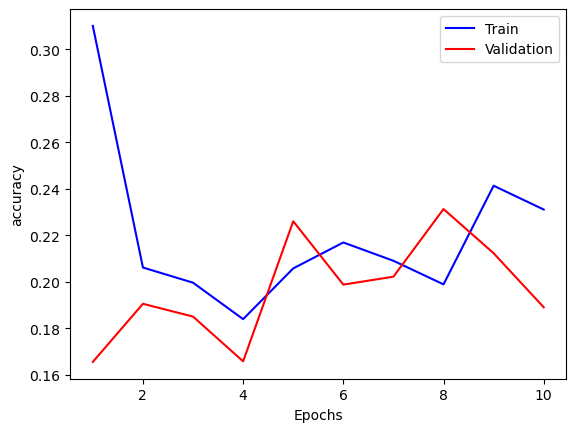

In [7]:
DL_plot(history)

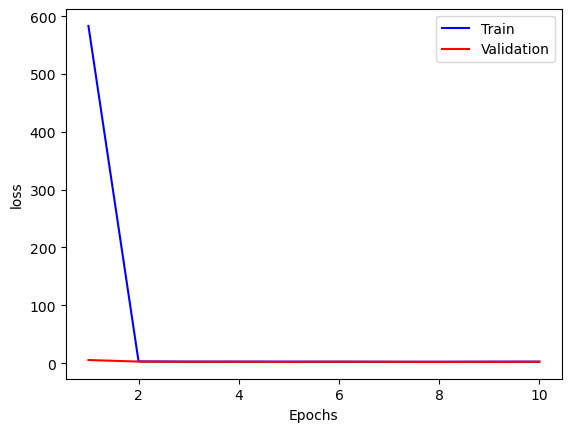

In [8]:
DL_plot(history, plt_type='loss')

### Learning rate too low

In [9]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(1e-10),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 17ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.0981
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.0981
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.0981
Epoch 4/10
375/375 [==============================] - 10s 26ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.0981
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.0981
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.0981
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 2.3891 - accuracy: 0.0969 - val_loss: 2.3905 - val_accuracy: 0.098

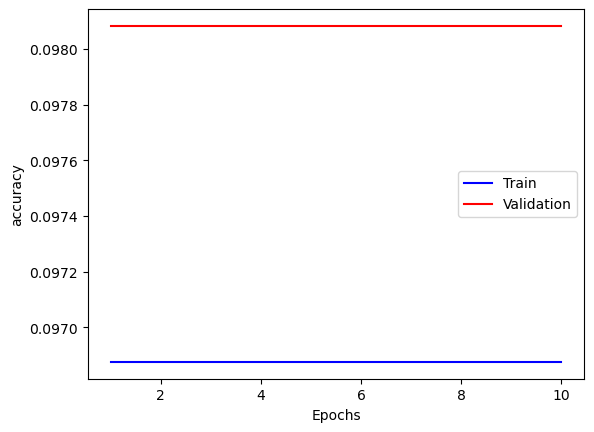

In [11]:
DL_plot(history)

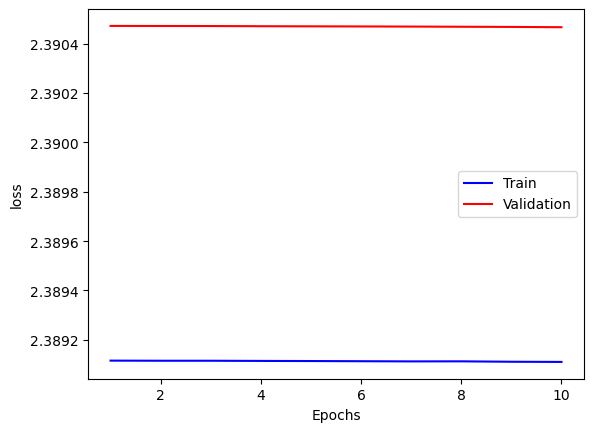

In [12]:
DL_plot(history, plt_type='loss')

### Appropriate learning rate

In [13]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2942 - accuracy: 0.9158 - val_loss: 0.1585 - val_accuracy: 0.9542
Epoch 2/10
375/375 [==============================] - 5s 15ms/step - loss: 0.1227 - accuracy: 0.9643 - val_loss: 0.1046 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0902 - val_accuracy: 0.9732
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0855 - val_accuracy: 0.9736
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0444 - accuracy: 0.9870 - val_loss: 0.0808 - val_accuracy: 0.9761
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0790 - val_accuracy: 0.9775
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0248 - accuracy: 0.9931 - val_loss: 0.0765 - val_accuracy: 0.9783

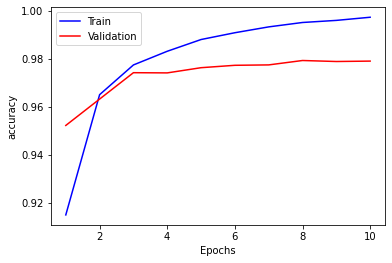

In [14]:
DL_plot(history)

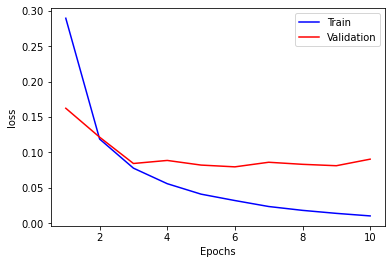

In [15]:
DL_plot(history, plt_type='loss')

### Model Won't overfit

In [15]:
model = Sequential([
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images,
                      train_labels,
                      epochs=50,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=1) # change to 1 to see the loss, accuracy per epoch

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5187 - accuracy: 0.8521 - val_loss: 0.5227 - val_accuracy: 0.8477
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5174 - accuracy: 0.8530 - val_loss: 0.5202 - val_accuracy: 0.8493
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5161 - accuracy: 0.8536 - val_loss: 0.5230 - val_accuracy: 0.8485
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.8537 - val_loss: 0.5215 - val_accuracy: 0.8493
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.8536 - val_loss: 0.5163 - val_accuracy: 0.8501
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5114 - accuracy: 0.8543 - val_loss: 0.5150 - val_accuracy: 0.8507
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5096 - accuracy: 0.8551 - val_loss: 0.5127 - val_accuracy: 0.8520
Epoch 

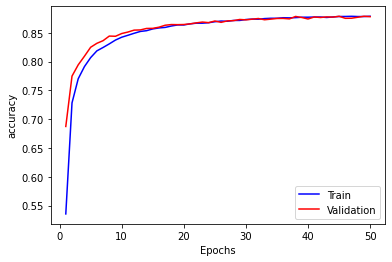

In [23]:
DL_plot(history)

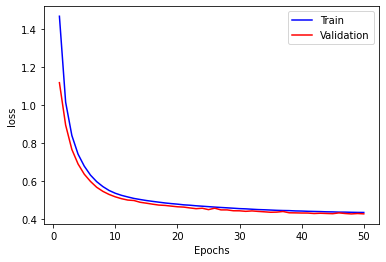

In [24]:
DL_plot(history, plt_type='loss')

### Model Won't Overfit: add more capacity to model

In [18]:
model = Sequential([
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_images,
                      train_labels,
                      epochs=50,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

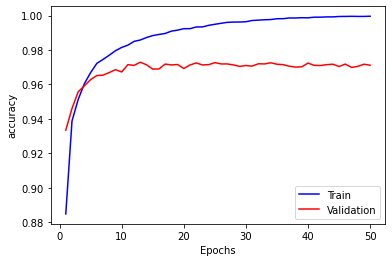

In [27]:
DL_plot(history)

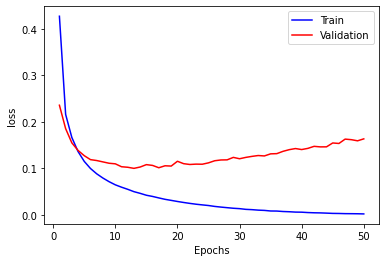

In [28]:
DL_plot(history, plt_type='loss')

### Regularization: Original Overfitting Model

In [29]:
model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
original = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

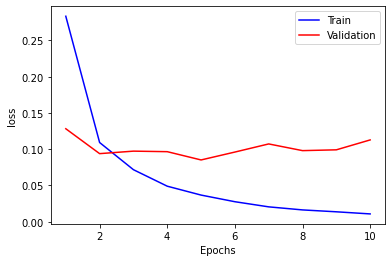

In [31]:
DL_plot(original, plt_type='loss')

#### Regularization: Reduce Number of Layers 

In [32]:
model = Sequential([
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
reduce_layers = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

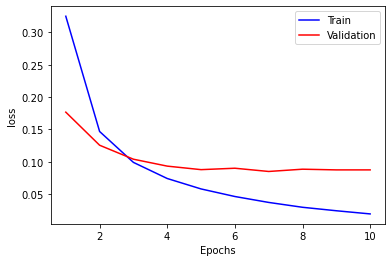

In [34]:
DL_plot(reduce_layers, plt_type='loss')

#### Regularization: Reduce Number of Neurons

In [35]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
reduce_neurons = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

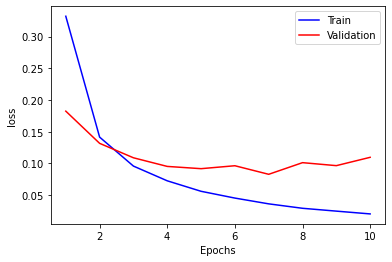

In [37]:
DL_plot(reduce_neurons, plt_type='loss')

#### Regularization: Add L2 Weight Regularization

In [38]:
from tensorflow.keras.regularizers import l2

In [39]:
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.003)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.003)),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
L2 = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

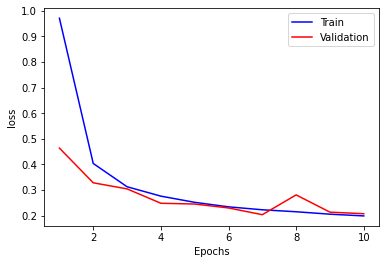

In [41]:
DL_plot(L2, plt_type='loss')

#### Regularization: Add L1 Weight Regularization

In [42]:
from tensorflow.keras.regularizers import l1

In [43]:
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l1(0.003)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.003)),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
L1 = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

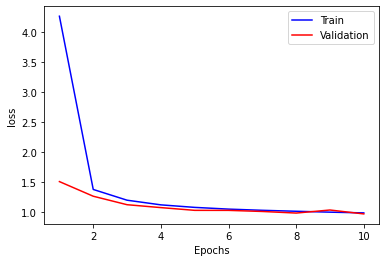

In [45]:
DL_plot(L1, plt_type='loss')

#### Regularization: Add Dropout

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
dropout = model.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

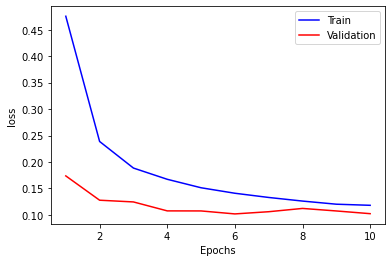

In [49]:
DL_plot(dropout, plt_type='loss')